# Transfer Learning

In [1]:
import torchvision.models as models

#resnet18 = models.resnet18()
#alexnet = models.alexnet()
#vgg16 = models.vgg16()
#squeezenet = models.squeezenet1_0()
#densenet = models.densenet161()
#inception = models.inception_v3()
#googlenet = models.googlenet()
#shufflenet = models.shufflenet_v2_x1_0()
#mobilenet = models.mobilenet_v2()
#resnext50_32x4d = models.resnext50_32x4d()
#wide_resnet50_2 = models.wide_resnet50_2()
#mnasnet = models.mnasnet1_0()

In [2]:
model = models.vgg16()

In [3]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [4]:
# 모든 모델은 RGB 3채널, 크기는 (224, 224)이며 다음 transform을 이용해 Normalize 되어야 한다. inception_v3의 크기만 (299, 299)이다.
# 모든 모델들은 ImageNet에 기준하여 학습되어 있으며 output은 1000이다.

import torchvision.transforms as transforms

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

In [5]:
import torch.nn as nn

model.classifier[6] = nn.Linear(4096, 10) # 마지막 클래스의 갯수로 학습

In [6]:
import os
import random
import numpy as np
import torch
import torchvision

In [7]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [8]:
dataset = torchvision.datasets.CIFAR10('./data', download=True)

Extracting ./data/cifar-10-python.tar.gz to ./data


In [9]:
print(type(dataset))

# tuple: (image, target)

torchvision.datasets.cifar.CIFAR10


In [10]:
print(len(dataset))

50000


In [11]:
n = 200
data, target = dataset[n]

In [12]:
print(type(data))

<class 'PIL.Image.Image'>


In [13]:
print(data.mode, data.width, data.height)

RGB 32 32


In [14]:
print(type(target))

<class 'int'>


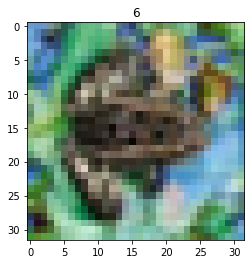

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data)
data.show()

In [16]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
ToTensor = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.CIFAR10('./data', transform = ToTensor)

In [17]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])


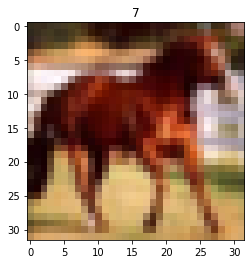

In [18]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic)
    plt.show()
    break

In [19]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])


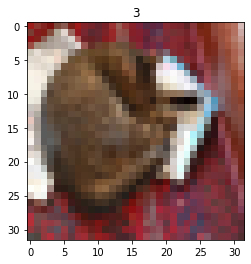

In [20]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(pic)
    plt.show()
    break

In [21]:
# 1000개 batch
n = 1000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 2000개 batch
n = 2000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 999개 batch
n = 999
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))

print(l)
print('Total number of data: {}'.format(i))

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Total number of data: 50000
[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
Total number of data: 50000
[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 50]
Total number of data: 50000


In [22]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [23]:
import torchvision.transforms as transforms
compose_train = transforms.Compose([
                      transforms.Resize((224, 224)),
                      transforms.RandomHorizontalFlip(),
                      transforms.RandomRotation(10),
                      transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                      transforms.ToTensor(),
                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
                      ])
compose_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
])


train_data = torchvision.datasets.CIFAR10(root='./data/', train='True', transform=compose_train, download=True)
test_data  = torchvision.datasets.CIFAR10(root='./data/', train='False', transform=compose_test, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [24]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 50000
test sets: 50000


In [25]:
BATCH_SIZE = 10

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [26]:
model = models.vgg16(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

model.classifier[6] = nn.Linear(4096, 10)# 마지막 클래스의 갯수로 학습
model = model.to(device)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [27]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 3, 224, 224])
tensor([[-0.5143,  0.4007,  0.5252,  0.2909, -0.0632,  0.0881,  0.2418, -0.4160,
         -0.3344, -0.6973],
        [-0.5559,  0.6732, -0.6295,  0.4105, -0.1289, -0.2520, -0.5260, -0.1692,
          0.3183, -0.5097],
        [ 0.3255,  0.2361,  0.1653, -0.2407,  0.2261, -0.2814, -0.1874,  0.3729,
         -0.3143, -1.2028],
        [-0.8487, -0.7039, -0.0503, -0.0486, -0.0091, -0.1255, -0.5341, -0.1311,
         -0.2550, -0.0610],
        [ 0.2778, -0.4527, -0.0367, -0.2360,  0.5368,  0.0786, -0.0155,  0.0185,
          0.2403, -0.4425],
        [-0.3214, -0.4164,  0.7455, -0.3449,  0.6787, -0.2516,  0.0105, -0.4828,
         -0.1089, -0.3730],
        [ 0.4050, -0.2912, -0.1400,  0.5283,  0.3575, -0.6635, -0.2951, -0.7050,
         -0.3983, -0.1114],
        [-0.4275, -0.1898, -0.1410, -0.1242, -0.4113, -0.3787,  0.0384, -0.0255,
          0.2346, -0.2744],
        [-0.3461, -0.0768, -0.2261,  0.4488, -0.0432, -0.2440, -0.1949,  0.0892,
         -0.5701,

In [28]:
BATCH_SIZE = 40

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [29]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 5 # 5회 학습

list_training_loss = []
list_test_loss = []
batch_length = int(len(train_data) / BATCH_SIZE)

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y = model(train_data)
        del train_data
        loss = criterion(y, train_target).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1
        del train_target
        if( n_train % 100 == 0 ):
          print('epoch {}th: {}/{} loss - {}'.format(epoch, n_train, batch_length, loss.data.cpu().numpy().sum()))


    model.eval()
    n_test = 0
    test_loss = 0
    correct = 0
    total = 0
    for test_data, test_target in test_loader:
        test_data = test_data.to(device)
        test_target = test_target.to(device)
        y_pred = model(test_data)
        idx_pred = torch.max(y_pred, 1)[1]
        del test_data
        loss = criterion(y_pred, test_target).sum()
        test_loss += loss.data.cpu().numpy()
        n_test += 1
        total += len(test_target)
        correct += (idx_pred == test_target).sum()

    accuracy = correct * 100 / total
    print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
            epoch + 1, train_loss / n_train, test_loss / n_test,
            accuracy
        ))
    list_training_loss.append(train_loss / n_train)
    list_test_loss.append(test_loss / n_test)

epoch 0th: 100/1250 loss - 1.1720608472824097


KeyboardInterrupt: ignored